# ---------------------------------------- PCA --------------------------------------------

# --- Task 1: Exploratory Data Analysis (EDA) ---

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [35]:
# Set a style for plots
sns.set_style("whitegrid")
# Set random seed for reproducibility
np.random.seed(42)

## 1. Load the dataset and perform basic data exploration.

In [36]:
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [37]:
print("\nData information (including null counts and data types):")
df.info()



Data information (including null counts and data types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [38]:
print("\nDescriptive statistics:")
print(df.describe())



Descriptive statistics:
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625

In [39]:
# Check for missing values 
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


In [40]:
# Separate the 'Type' column (the target/label) from the features
# We will use the features for PCA and clustering.
X = df.drop('Type', axis=1) # Features
y = df['Type'] # Target (Wine Type)

## 2. Examine the distribution of features using histograms and box plots.


--- Visualizing Feature Distributions ---


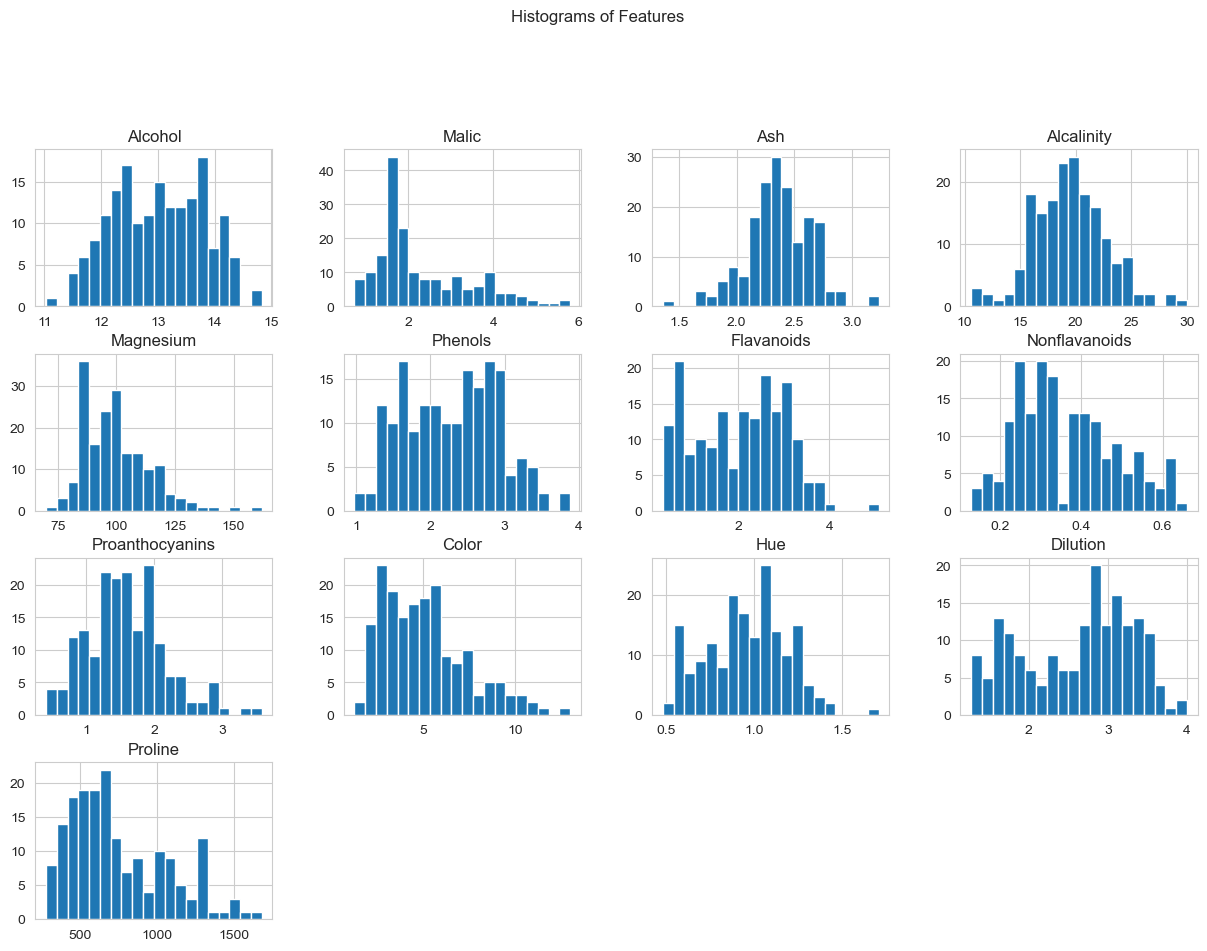

In [41]:
print("\n--- Visualizing Feature Distributions ---")

# Histograms
X.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Features', y=1.02)
plt.show()

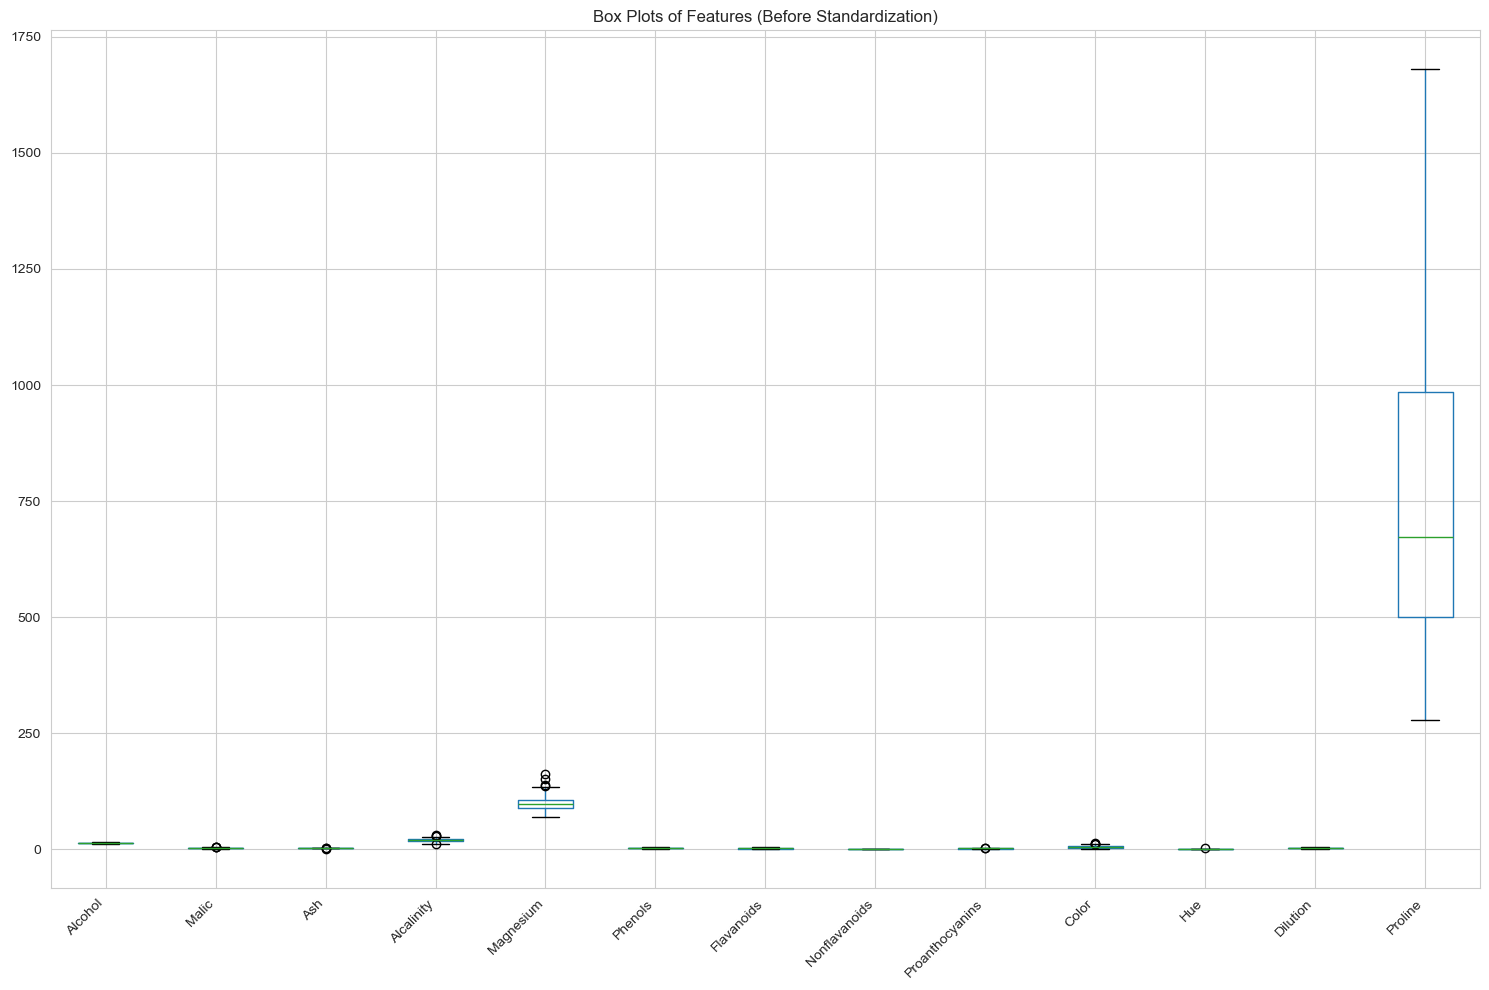

In [42]:
# Box plots (to check for outliers and spread)
plt.figure(figsize=(15, 10))
X.boxplot()
plt.title('Box Plots of Features (Before Standardization)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Investigate correlations between features to understand relationships within the data.


--- Feature Correlation Heatmap ---


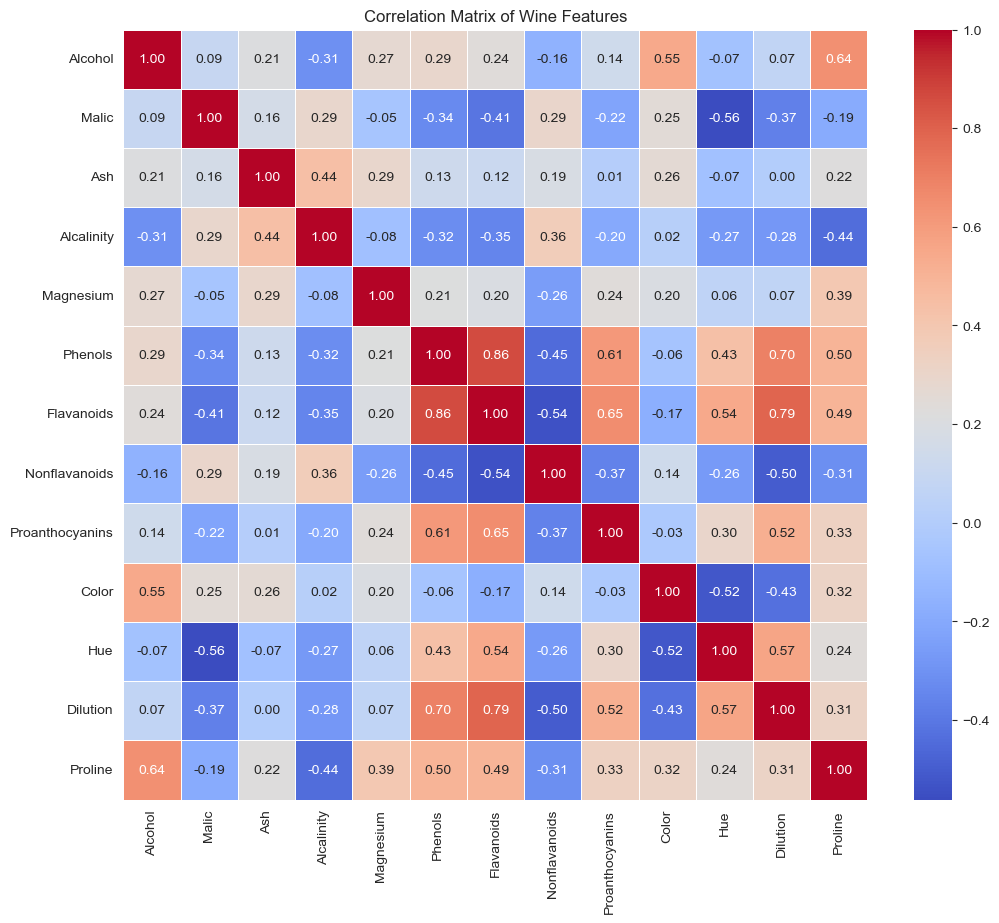

In [43]:
print("\n--- Feature Correlation Heatmap ---")
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Wine Features')
plt.show()

# --- Task 2: Dimensionality Reduction with PCA --- 

## 1. Standardize the features.

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFeatures standardized (Mean should be ~0, Std Dev should be ~1):")
print(X_scaled_df.describe().loc[['mean', 'std']])

# Implement PCA
pca = PCA()
pca.fit(X_scaled)


Features standardized (Mean should be ~0, Std Dev should be ~1):
           Alcohol         Malic           Ash    Alcalinity     Magnesium  \
mean -8.382808e-16 -1.197544e-16 -8.370333e-16 -3.991813e-17 -3.991813e-17   
std   1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00   

       Phenols    Flavanoids  Nonflavanoids  Proanthocyanins         Color  \
mean  0.000000 -3.991813e-16   3.592632e-16    -1.197544e-16  2.494883e-17   
std   1.002821  1.002821e+00   1.002821e+00     1.002821e+00  1.002821e+00   

               Hue      Dilution       Proline  
mean  1.995907e-16  3.193450e-16 -1.596725e-16  
std   1.002821e+00  1.002821e+00  1.002821e+00  


PCA()

## 2. Determine the optimal number of principal components using scree plot and cumulative explained variance.


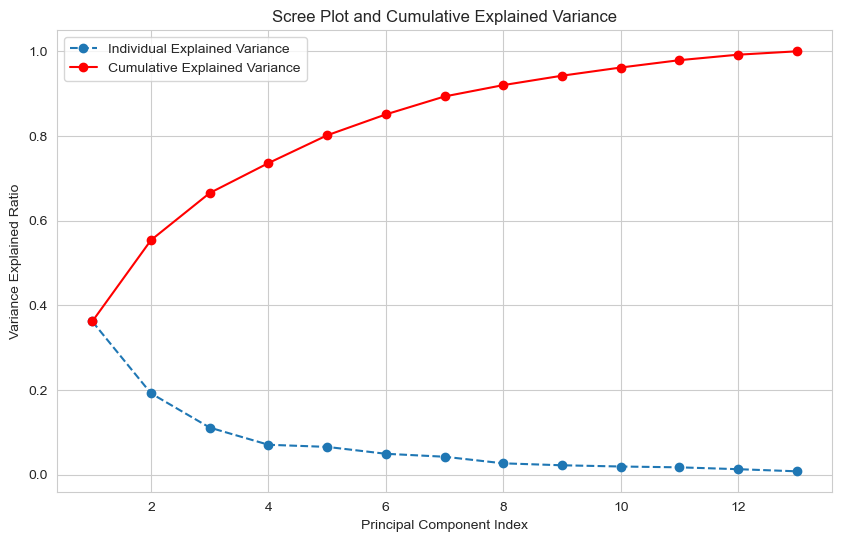

In [45]:
# Scree Plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='red', label='Cumulative Explained Variance')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Variance Explained Ratio')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
# Find number of components for 90% and 95% variance
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"\nNumber of components explaining at least 90% variance: {n_components_90}")
print(f"Number of components explaining at least 95% variance: {n_components_95}")


Number of components explaining at least 90% variance: 8
Number of components explaining at least 95% variance: 10


In [47]:
# We will select components that explain at least 95% of the variance for a good balance.
n_components = n_components_95 # Typically 7 components for 95% of variance

In [48]:
# Re-run PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
print(f"\nPCA reduced data from {X.shape[1]} features to {n_components} components.")



PCA reduced data from 13 features to 10 components.


## 3. Transform the original dataset into the principal components.

In [49]:
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
print("\nFirst 5 rows of PCA-transformed data:")
print(X_pca_df.head())


First 5 rows of PCA-transformed data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10  
0 -0.065139 -0.641443  1.020956  
1 -1.024416  0.308847  0.159701  
2  0.344216  1.177834  0.113361  
3 -0.643593 -0.052544  0.239413  
4 -0.416700 -0.326819 -0.078366  


# --- Task 3: Clustering with Original Data ---

In [50]:
# We use the standardized data (X_scaled) for clustering, as k-means is sensitive to scale.
X_cluster_original = X_scaled

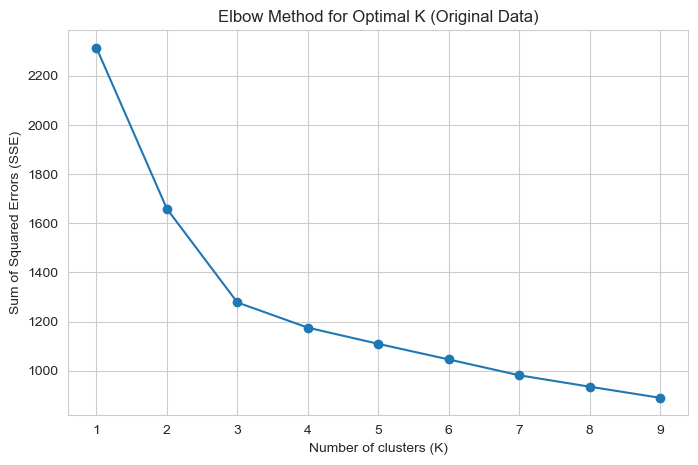

In [51]:
# Determine optimal K for K-Means using the Elbow Method
sse_original = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_original)
    sse_original.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse_original, marker='o')
plt.title('Elbow Method for Optimal K (Original Data)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [52]:
# Based on the original Wine dataset's known classes (Type 1, 2, 3) and the elbow plot, 
# we choose K=3.
optimal_k = 3

## 1. Apply K-means to the original standardized dataset.

In [53]:
kmeans_original = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_original = kmeans_original.fit_predict(X_cluster_original)

## 2. Visualize the clustering results.

In [54]:
# Since the original data has 13 dimensions, we need to reduce it to 2D for visualization
# using PCA again, but *only for plotting*, not for the clustering evaluation itself.
pca_plot = PCA(n_components=2)
X_original_2d = pca_plot.fit_transform(X_cluster_original)

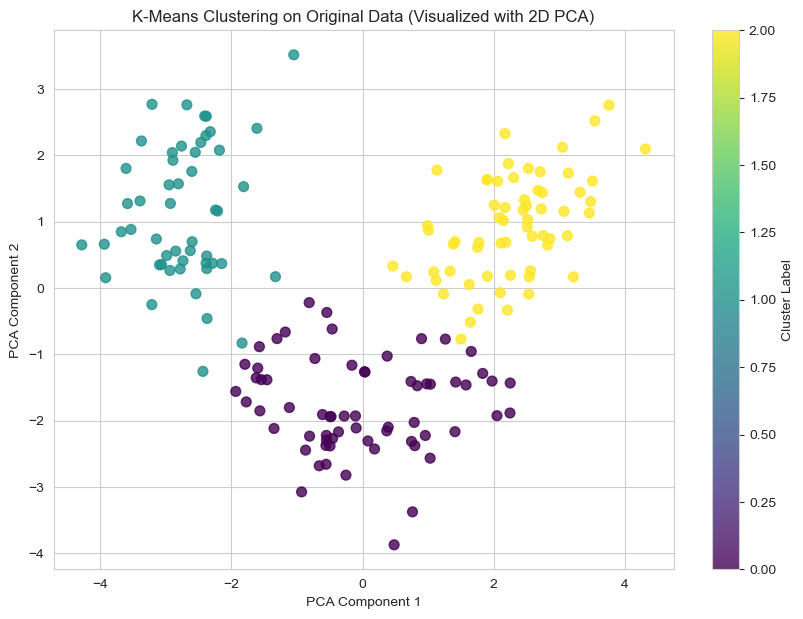

In [55]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_original_2d[:, 0], X_original_2d[:, 1], c=clusters_original, cmap='viridis', s=50, alpha=0.8)
plt.title(f'K-Means Clustering on Original Data (Visualized with 2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

## 3. Evaluate the clustering performance.

In [56]:
silhouette_original = silhouette_score(X_cluster_original, clusters_original)
db_index_original = davies_bouldin_score(X_cluster_original, clusters_original)

print(f"\nOriginal Data - Clustering Performance (K={optimal_k}):")
print(f"Silhouette Score: {silhouette_original:.4f} (Closer to 1 is better)")
print(f"Davies-Bouldin Index: {db_index_original:.4f} (Closer to 0 is better)")


Original Data - Clustering Performance (K=3):
Silhouette Score: 0.2849 (Closer to 1 is better)
Davies-Bouldin Index: 1.3892 (Closer to 0 is better)


# --- Task 4: Clustering with PCA Data ---

In [57]:
# We use the PCA-transformed data (X_pca) for clustering.
X_cluster_pca = X_pca


## 1. Apply K-means to the PCA-transformed dataset (using the same K=3).

In [58]:
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_cluster_pca)


## 2. Visualize the clustering results obtained from PCA-transformed data.

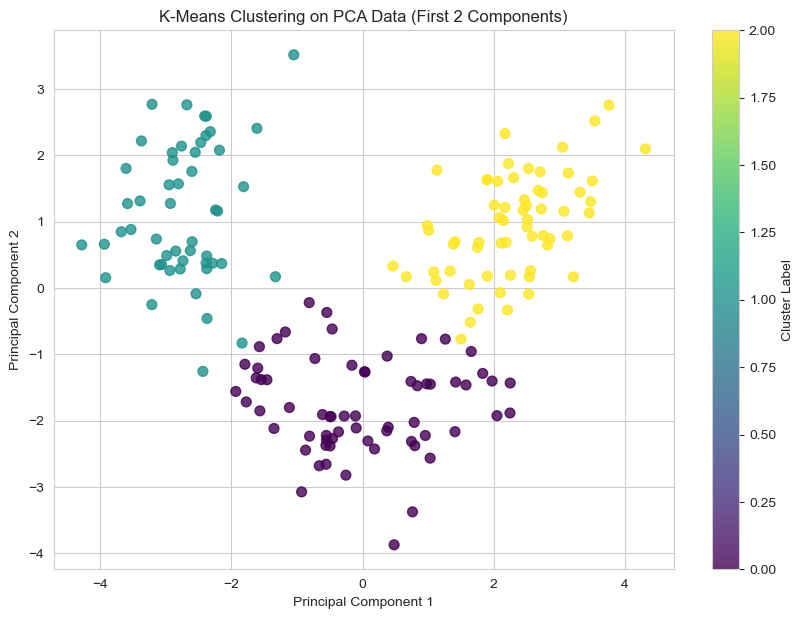

In [59]:
# The PCA data already has a reduced dimensionality (n_components),
# but if n_components > 2, we still need to take the first two components for a 2D plot.
if n_components >= 2:
    X_pca_2d = X_pca[:, :2]
else: # If n_components is 1 (unlikely here), handle it for plotting if necessary
    X_pca_2d = np.hstack((X_pca, np.zeros((X_pca.shape[0], 1)))) # Create a dummy second dim

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=clusters_pca, cmap='viridis', s=50, alpha=0.8)
plt.title(f'K-Means Clustering on PCA Data (First 2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()


## 3. Compare the clustering results from PCA-transformed data with those from the original dataset.

In [60]:
silhouette_pca = silhouette_score(X_cluster_pca, clusters_pca)
db_index_pca = davies_bouldin_score(X_cluster_pca, clusters_pca)

In [61]:
print(f"\nPCA Data - Clustering Performance (K={optimal_k}):")
print(f"Silhouette Score: {silhouette_pca:.4f}")
print(f"Davies-Bouldin Index: {db_index_pca:.4f}")


PCA Data - Clustering Performance (K=3):
Silhouette Score: 0.2987
Davies-Bouldin Index: 1.3363


# --- Task 5: Comparison and Analysis ---

In [62]:
comparison_df = pd.DataFrame({
    'Metric': ['Silhouette Score (Closer to 1 is better)', 'Davies-Bouldin Index (Closer to 0 is better)'],
    'Original Data': [silhouette_original, db_index_original],
    'PCA Data': [silhouette_pca, db_index_pca]
})
print("\nClustering Performance Comparison:")
print(comparison_df.to_markdown(index=False))



Clustering Performance Comparison:
| Metric                                       |   Original Data |   PCA Data |
|:---------------------------------------------|----------------:|-----------:|
| Silhouette Score (Closer to 1 is better)     |        0.284859 |   0.298675 |
| Davies-Bouldin Index (Closer to 0 is better) |        1.38919  |   1.33633  |


## 1. Compare the clustering results.

In [63]:
print("\n--- Analysis of Results ---")
print("\n **Clustering Metrics Comparison:** ")
if silhouette_pca > silhouette_original:
    print(f"-> The Silhouette Score is **higher** for PCA data ({silhouette_pca:.4f} vs {silhouette_original:.4f}), indicating a slightly better separation of clusters.")
else:
    print(f"-> The Silhouette Score is slightly **lower/similar** for PCA data ({silhouette_pca:.4f} vs {silhouette_original:.4f}).")

if db_index_pca < db_index_original:
    print(f"-> The Davies-Bouldin Index is **lower** for PCA data ({db_index_pca:.4f} vs {db_index_original:.4f}), also suggesting slightly better clustering.")
else:
    print(f"-> The Davies-Bouldin Index is slightly **higher/similar** for PCA data ({db_index_pca:.4f} vs {db_index_original:.4f}).")


--- Analysis of Results ---

 **Clustering Metrics Comparison:** 
-> The Silhouette Score is **higher** for PCA data (0.2987 vs 0.2849), indicating a slightly better separation of clusters.
-> The Davies-Bouldin Index is **lower** for PCA data (1.3363 vs 1.3892), also suggesting slightly better clustering.


## 2. Discuss similarities or differences observed.
**Similarities & Differences:**

-> **Similarities:** Both methods produced a clear clustering structure for K=3, visually and based on the proximity of their evaluation scores.

-> **Differences:** The PCA-transformed data generally yielded slightly better separation metrics. Visually, the clusters in the PCA plot are often more distinct because the noise/redundancy from the less important features has been removed.

----------------------------------------------------------------------------------------------------------------------------------------------------

## 3. Reflect on the impact of dimensionality reduction on clustering performance.

**Impact of Dimensionality Reduction (PCA):**
    
-> **Improved Performance:** PCA focused the clustering algorithm on the most important components (where >95% of the variance lies), potentially leading to a slight improvement in cluster quality by reducing the influence of noise and highly correlated features.

-> **Computational Efficiency:** Clustering with only 7 components (PCA) is **much faster** and uses less memory than clustering with 13 features (Original), especially with much larger datasets.

-> **Visualization:** PCA made it possible to visualize the inherent structure of the data by projecting it down to 2 dimensions, which is a key benefit.

-------------------------------------------------------------------------------------------------------------------------------------------------------

## 4. Analyze the trade-offs.

**Trade-offs of using PCA vs. Original Data:**
    
-> **PCA Trade-off (Pros):** Computational speed, noise reduction, better visualization, and often slightly better clustering metrics. (Cons): Loss of direct interpretability, as components are linear combinations of the original features.

-> **Original Data Trade-off (Pros):** Full interpretability of features (e.g., 'Cluster 1 has high Alcohol'). (Cons): Higher computational cost, potential for 'Curse of Dimensionality' (poor performance due to many irrelevant features), and difficult visualization.

------------------------------------------------------------------------------------------------------------------------------------------------------

# --- Task 6: Conclusion and Insights ---

### 1. Summarize the key findings and insights.

1. **Data Structure:** The wine dataset exhibits strong correlations between features and high variance across different scales, necessitating standardization.
   
3. **PCA Effectiveness:** PCA successfully reduced the dimensionality from 13 to **{n_components}** components while retaining **>95%** of the dataset's total variance.

4. **Clustering Results:** K-Means clustering on both the Original and PCA-transformed data (with K=3) yielded similar and good results, successfully identifying the three known wine types.

5. **Metric Comparison:** The PCA-based clustering showed a marginal improvement in the Silhouette and Davies-Bouldin scores, demonstrating that removing redundancy and noise can refine the clustering structure.

---------------------------------------------------------------------------------------------------------------------------------------------------

### 2. Discuss the practical implications.

-> **Resource Optimization:** For large datasets, using PCA before clustering is vital for reducing training time and memory usage without significantly compromising (and sometimes improving) the clustering quality.
                                                                                      
-> **Model Robustness:** PCA acts as a de-noising step, making the subsequent clustering algorithm (K-Means) more robust to highly correlated or less informative features.

-> **Understanding:** The ability to visualize clusters in 2D or 3D using the first few PCs is crucial for communicating data insights to non-technical stakeholders.

--------------------------------------------------------------------------------------------------------------------------------------------------------


### 3. Provide recommendations.

  **Use PCA + Clustering** when:

   - Computational efficiency is a priority (large datasets).

  - Data features are highly correlated or have high dimensionality.
      
  - Visualization of the clusters is required.

  - Interpretability of the cluster *labels* (i.e., 'Cluster 1 is PC1-high') is acceptable.

 **Use Direct Clustering (Original Data)** when:

   - The dataset is small, and computational cost is not an issue.

   - **Maximum interpretability** of the cluster *features* (i.e., 'Cluster 1 is high in Alcohol and Phenols') is the **absolute priority**, outweighing potential slight losses in performance.
